In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#df = pd.read_csv('https://docs.google.com/spreadsheets/d/13OPoSocCPJEkbbL6NspkAmCLjPITbGK-25kKujqCJdw/export?gid=0&format=csv', names=['Artist(s)', 'Title', 'Genre'])
df = pd.read_json('music.json')

In [3]:
genres = df['genre']
unique_genres = {}

for items in genres.items():
    genre_entry = items[1]
    if genre_entry in unique_genres:
        unique_genres[genre_entry] += 1
    else:
        unique_genres[genre_entry] = 1

unique_genres = dict(sorted(unique_genres.items(), key=lambda item: item[1], reverse=True))

labels = list(unique_genres.keys())
values = list(unique_genres.values())

## Pie Chart

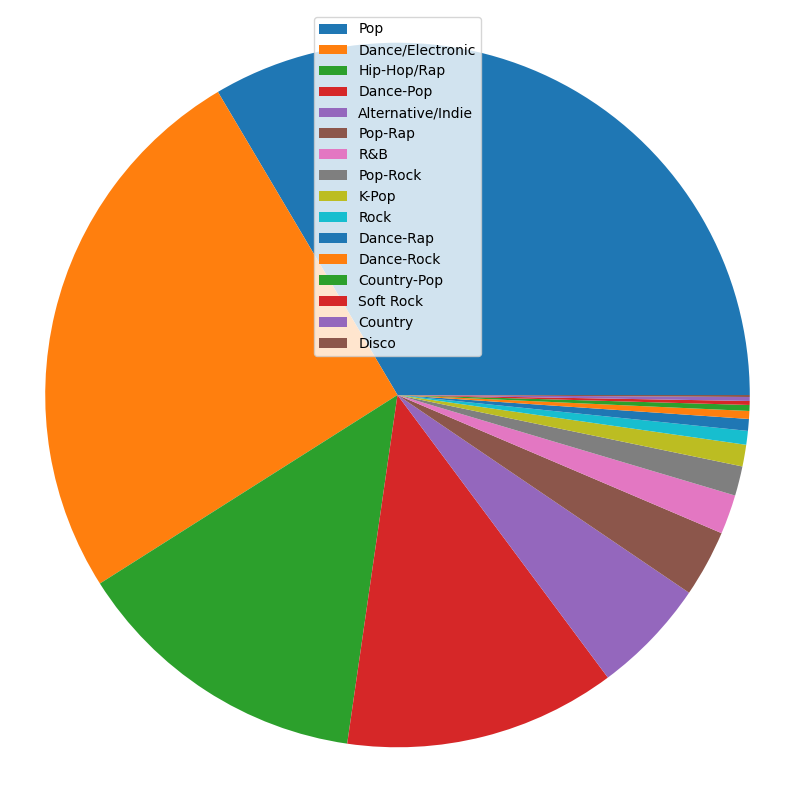

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(values)
ax.axis('equal')
ax.legend(labels, loc='best')
plt.show()

In [5]:
fig.savefig('pictures/pie.png', bbox_inches='tight')

## Donut Chart

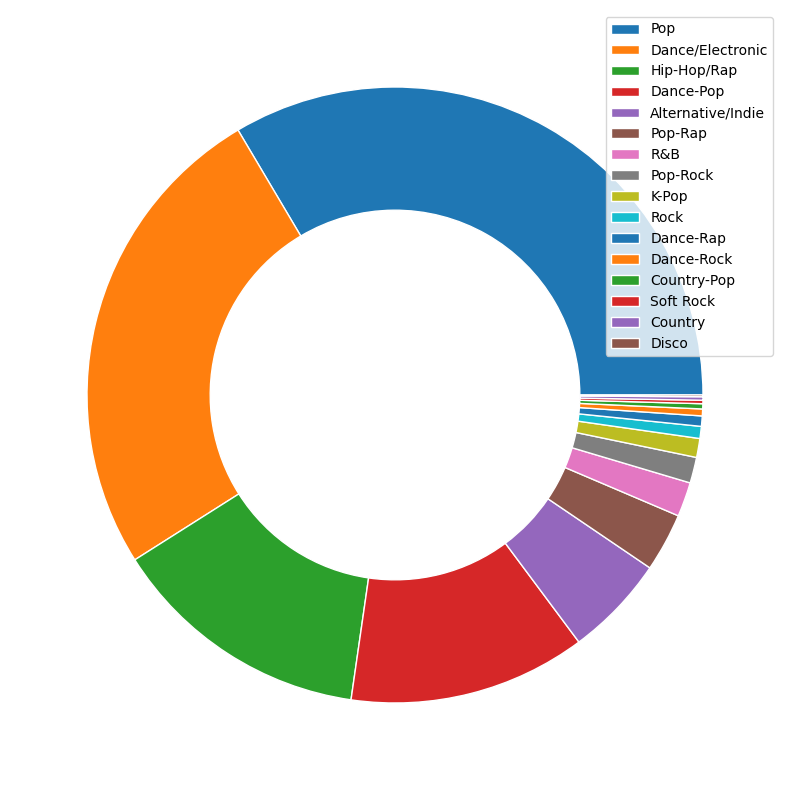

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(values, radius=1, wedgeprops=dict(width=0.4, edgecolor='w'))
ax.set(aspect="equal")
ax.legend(labels, loc='best')
plt.show()

In [7]:
fig.savefig('pictures/donut.png', bbox_inches='tight')

## Horizontal Bar Chart

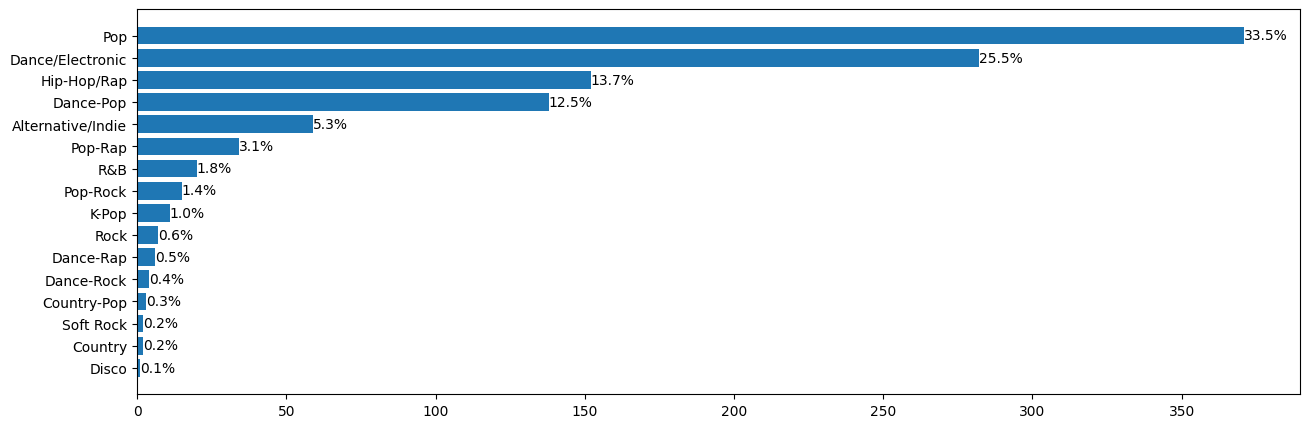

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
ax.barh(np.arange(len(labels)), values, align='center')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.invert_yaxis()

for i, v in enumerate(values):
    ax.text(v, i, str('{:.1f}%'.format(v/sum(values)*100)), va='center')
    
plt.show()

In [9]:
fig.savefig('pictures/bar.png', bbox_inches='tight')

## Scatter Plot

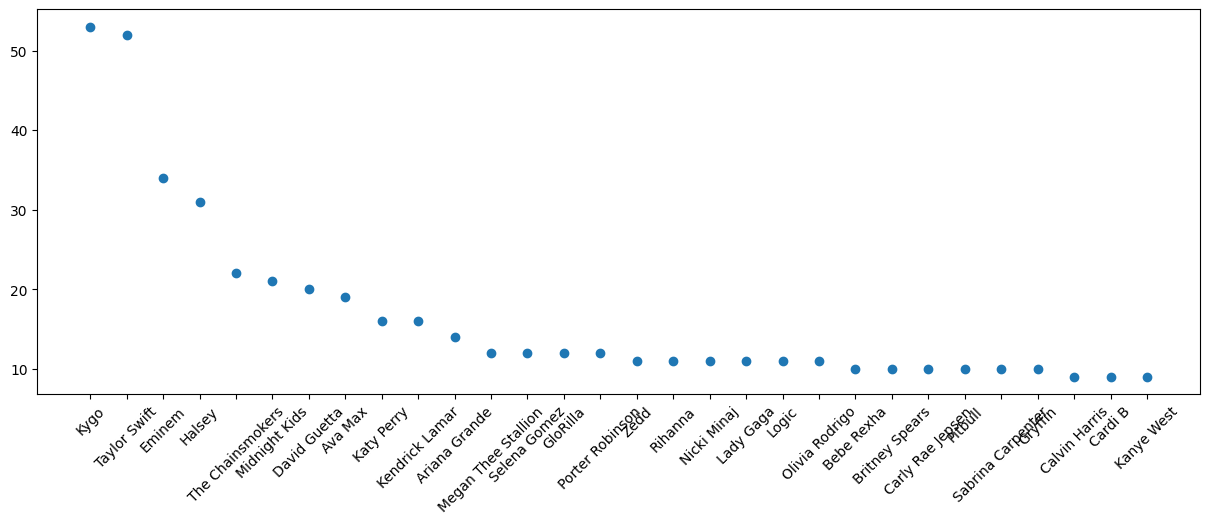

In [10]:
artists_dict = {}

artists_col = df['artist']
for i in range(len(artists_col)):
    artist_row = artists_col[i]
    artist_split_ft = artist_row.split(' ft. ')
    for artist in artist_split_ft:
        artist_split_comma = artist.split(', ')
        for a in artist_split_comma:
            if a in artists_dict:
                artists_dict[a] += 1
            else:
                artists_dict[a] = 1

sorted_artists = dict(sorted(artists_dict.items(), key=lambda item: item[1], reverse=True))

labels = []
values = []
for k,v in sorted_artists.items():
    if len(labels) == 30:
        break
    labels.append(k)
    values.append(v)

fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(labels, values)
plt.xticks(rotation=45)
plt.show()

In [11]:
fig.savefig('pictures/scatter.png', bbox_inches='tight')